In [1]:
import pandas as pd
#!pip install altair
import altair as alt# Importing Libraries
import pandas as pd
import plotly.express as px
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import explained_variance_score,max_error,mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
Crimes_Data=pd.read_csv("csvData.csv")

In [3]:
Crimes_Data=Crimes_Data[['State','rate']]

In [4]:
Crimes_Data

,State,rate
0,New Mexico,6462.032
1,Louisiana,6408.216
2,Colorado,6090.756
3,South Carolina,5972.837
4,Arkansas,5898.753
5,Oklahoma,5869.825
6,Washington,5758.570
7,Tennessee,5658.304
8,Oregon,5609.893
9,Missouri,5604.784


In [5]:
Soc_Data=pd.read_csv("Cleaned_Social_File.csv")

In [6]:
Soc_Data=Soc_Data.loc[:,~Soc_Data.columns.str.contains('Error', case=False)] 

In [7]:
merged_inner = pd.merge(left=Soc_Data, right=Crimes_Data, left_on='Geographic Area Name', right_on='State')

In [8]:
INPUT=merged_inner[merged_inner.columns[3:-2]]

In [9]:
OUTPUT=merged_inner['rate']

In [10]:
INPUT=INPUT.dropna(axis=1)

In [11]:
INPUT.columns[0][:10]

'Estimate!!'

In [12]:
#INPUT.columns = [INPUT.replace('Estimate!!', '') for col in INPUT.columns]

In [13]:
#COLSS=INPUT.T.index.str.replace("Estimate!!","")

In [14]:
#COLSS=COLSS.str.replace("Percent!!","")

In [15]:
#INPUT.columns=COLSS

In [16]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesRegressor
# load data
X = INPUT
Y = OUTPUT
# feature extraction
model = ExtraTreesRegressor(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 8.45855587e-05
 2.53732062e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.34294807e-06 0.00000000e+00 1.06899504e-05 0.00000000e+00
 7.49481134e-04 0.00000000e+00 2.70442107e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.62675825e-07 1.19185756e-04
 0.00000000e+00 0.00000000e+00 1.86461668e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.19440559e-06 8.05161612e-06 0.00000000e+00
 1.08723007e-03 0.00000000e+00 0.00000000e+00 2.84330022e-05
 1.44026424e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.65323677e-06 2.53732062e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.39589243e-02 2.07090058e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43328094e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [17]:
Feat_Imp=pd.DataFrame(model.feature_importances_)

In [18]:
Feat_Imp['Columns']=INPUT.columns

In [19]:
Selected_30=INPUT[list(Feat_Imp.sort_values(0).tail(30)['Columns'])]

In [20]:
Inputs=Selected_30.copy()

In [21]:
Inputs

,Percent!!RACE!!Total population!!One race!!Asian!!Filipino,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers,Percent!!RACE!!Total population!!Two or more races!!White and Black or African American,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone,Percent!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Other Indo-European languages,"Percent!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Families!!$50,000 to $74,999",Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2019 or later,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 19 to 64 years!!In labor force:!!Unemployed:!!With health insurance coverage!!With public coverage,"Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas",Percent!!RELATIONSHIP!!Population in households!!Spouse,...,"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Estimate!!UNITS IN STRUCTURE!!Total housing units!!Boat, RV, van, etc.",Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!ANCESTRY!!Total population!!Slovak,Percent!!ANCESTRY!!Total population!!Italian,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 19 to 64 years!!In labor force:!!Employed:!!No health insurance coverage,Percent!!Race alone or in combination with one or more other races!!Total population!!American Indian and Alaska Native,Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier,Percent!!SEX AND AGE!!Total population!!55 to 59 years,Percent!!ANCESTRY!!Total population!!Lithuanian
0,0.1,5.5,0.8,0.3,0.7,18.3,25.6,24.0,109278,18.3,...,2.8,3186,90.1,0.0,1.7,12.2,2.1,4.7,6.6,0.0
1,3.7,6.1,1.0,0.5,2.0,16.1,30.1,46.7,7501,18.3,...,9.1,348,88.6,0.0,2.5,13.7,20.7,1.6,5.9,0.1
2,0.7,6.0,1.0,0.6,1.9,17.5,32.7,43.7,79939,18.8,...,3.2,9411,89.3,0.1,3.9,13.4,6.0,1.4,5.8,0.2
3,0.2,6.9,0.9,0.2,0.8,19.9,29.9,42.8,74310,19.2,...,3.5,2179,90.8,0.0,1.4,12.1,2.8,4.4,6.5,0.0
4,3.3,7.4,0.8,0.6,4.8,14.5,25.8,43.4,464435,16.9,...,3.4,19017,93.0,0.1,3.4,8.7,3.3,8.9,6.2,0.1
5,0.3,6.5,0.9,0.6,2.3,14.8,33.8,40.4,113314,19.7,...,3.3,2771,92.0,0.1,4.8,10.0,3.3,7.2,5.9,0.2
6,0.5,6.4,1.6,0.8,6.7,13.5,23.9,46.3,80721,19.0,...,2.6,1104,94.8,0.5,15.2,7.0,1.5,19.8,7.2,0.6
7,0.6,4.4,1.6,0.4,3.3,16.7,24.3,45.7,36954,19.0,...,4.3,972,94.3,0.2,9.3,8.0,2.4,8.4,6.7,0.2
8,0.5,6.8,1.2,0.7,5.5,18.4,30.8,23.1,77297,18.6,...,2.6,16652,87.9,0.1,5.5,15.8,1.4,2.0,6.7,0.2
9,0.3,5.6,1.4,0.5,2.6,17.0,29.4,19.7,175473,17.9,...,3.7,4465,87.4,0.0,2.2,15.2,2.4,4.0,6.3,0.1


In [22]:
Selected_30['Score']=OUTPUT

In [23]:
Toplot=pd.DataFrame(Selected_30.corr()['Score'])

In [24]:
#!pip install altair
import altair as alt# Importing Libraries

In [25]:
Toplot=Toplot.reset_index()

In [26]:
Toplot=Toplot.sort_values("Score",ascending=False)
Toplot=Toplot.reset_index(drop=True)
Toplot.columns=['Columns','Score']
Toplot['Importance']=Toplot.index+1

In [27]:
Toplot=Toplot.iloc[1:]

In [28]:
Toplot

,Columns,Score,Importance
1,Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occ...,0.541258,2
2,Percent!!HEALTH INSURANCE COVERAGE!!Civilian n...,0.478242,3
3,Percent!!INCOME AND BENEFITS (IN 2021 INFLATIO...,0.427675,4
4,Percent!!Race alone or in combination with one...,0.415589,5
5,Percent!!HISPANIC OR LATINO AND RACE!!Total po...,0.289985,6
6,Estimate!!UNITS IN STRUCTURE!!Total housing un...,0.272258,7
7,Percent!!HOUSEHOLDS BY TYPE!!Total households!...,0.265780,8
8,Estimate!!Race alone or in combination with on...,0.258330,9
9,Percent!!INCOME AND BENEFITS (IN 2021 INFLATIO...,0.241715,10
10,Percent!!RACE!!Total population!!One race!!Asi...,0.129854,11


In [29]:
alt.Chart(Toplot).mark_bar().encode(
    y='sum(Score):Q',
    x=alt.Y('Columns', sort='x')
).properties(
    title='Co-relation of each columns '
)

alt.Chart(...)

In [30]:
Inputs

,Percent!!RACE!!Total population!!One race!!Asian!!Filipino,Percent!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers,Percent!!RACE!!Total population!!Two or more races!!White and Black or African American,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone,Percent!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Other Indo-European languages,"Percent!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Families!!$50,000 to $74,999",Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2019 or later,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 19 to 64 years!!In labor force:!!Unemployed:!!With health insurance coverage!!With public coverage,"Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Bottled, tank, or LP gas",Percent!!RELATIONSHIP!!Population in households!!Spouse,...,"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Estimate!!UNITS IN STRUCTURE!!Total housing units!!Boat, RV, van, etc.",Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage,Percent!!ANCESTRY!!Total population!!Slovak,Percent!!ANCESTRY!!Total population!!Italian,Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 19 to 64 years!!In labor force:!!Employed:!!No health insurance coverage,Percent!!Race alone or in combination with one or more other races!!Total population!!American Indian and Alaska Native,Percent!!YEAR STRUCTURE BUILT!!Total housing units!!Built 1939 or earlier,Percent!!SEX AND AGE!!Total population!!55 to 59 years,Percent!!ANCESTRY!!Total population!!Lithuanian
0,0.1,5.5,0.8,0.3,0.7,18.3,25.6,24.0,109278,18.3,...,2.8,3186,90.1,0.0,1.7,12.2,2.1,4.7,6.6,0.0
1,3.7,6.1,1.0,0.5,2.0,16.1,30.1,46.7,7501,18.3,...,9.1,348,88.6,0.0,2.5,13.7,20.7,1.6,5.9,0.1
2,0.7,6.0,1.0,0.6,1.9,17.5,32.7,43.7,79939,18.8,...,3.2,9411,89.3,0.1,3.9,13.4,6.0,1.4,5.8,0.2
3,0.2,6.9,0.9,0.2,0.8,19.9,29.9,42.8,74310,19.2,...,3.5,2179,90.8,0.0,1.4,12.1,2.8,4.4,6.5,0.0
4,3.3,7.4,0.8,0.6,4.8,14.5,25.8,43.4,464435,16.9,...,3.4,19017,93.0,0.1,3.4,8.7,3.3,8.9,6.2,0.1
5,0.3,6.5,0.9,0.6,2.3,14.8,33.8,40.4,113314,19.7,...,3.3,2771,92.0,0.1,4.8,10.0,3.3,7.2,5.9,0.2
6,0.5,6.4,1.6,0.8,6.7,13.5,23.9,46.3,80721,19.0,...,2.6,1104,94.8,0.5,15.2,7.0,1.5,19.8,7.2,0.6
7,0.6,4.4,1.6,0.4,3.3,16.7,24.3,45.7,36954,19.0,...,4.3,972,94.3,0.2,9.3,8.0,2.4,8.4,6.7,0.2
8,0.5,6.8,1.2,0.7,5.5,18.4,30.8,23.1,77297,18.6,...,2.6,16652,87.9,0.1,5.5,15.8,1.4,2.0,6.7,0.2
9,0.3,5.6,1.4,0.5,2.6,17.0,29.4,19.7,175473,17.9,...,3.7,4465,87.4,0.0,2.2,15.2,2.4,4.0,6.3,0.1


In [31]:
OUTPUT

0     4727.065
1     5358.896
2     4940.118
3     5898.753
4     4719.900
5     6090.756
6     3311.746
7     4354.642
8     3922.458
9     4414.802
10    5076.880
11    2466.346
12    3544.667
13    3924.039
14    3699.976
15    4823.212
16    3818.102
17    6408.216
18    2420.932
19    3619.488
20    2415.177
21    3199.772
22    4527.250
23    4494.426
24    5604.784
25    4711.464
26    4152.405
27    4313.506
28    2344.184
29    2511.751
30    6462.032
31    3185.200
32    4577.236
33    4009.418
34    5869.825
35    5609.893
36    3677.679
37    2721.722
38    4872.292
39    5972.837
40    4414.837
41    5658.304
42    4936.535
43    5189.516
44    2607.376
45    3121.483
46    5758.570
47    3154.662
48    3294.709
49    3455.441
Name: rate, dtype: float64

In [32]:
Names=Crimes_Data['State']

In [33]:
import random 
random.seed(50)
X_train, X_test, y_train, y_test , Train_Sate,Test_State= train_test_split(Inputs, OUTPUT,Names, test_size=0.2)

In [34]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    #range_future = len(prediction)

    plt.plot(Test_State,np.array(y_test), label='True Future')
    plt.plot(Test_State,np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('A State')
    plt.ylabel('Crime Rate')
    plt.xticks(rotation=90)
    plt.show()

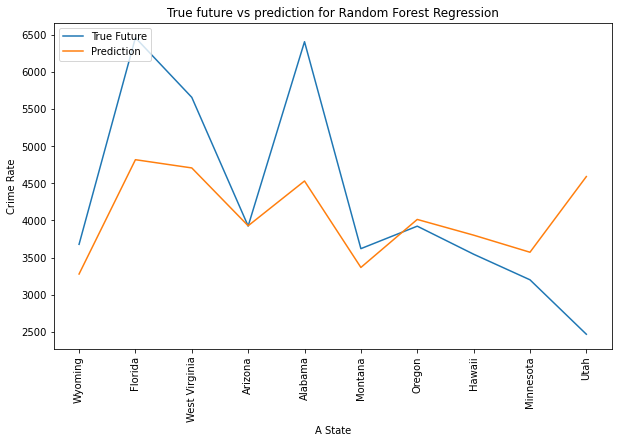

In [35]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preRF=pre
plot_future(pre, 'Random Forest Regression', y_test)

In [36]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    rmse=mean_squared_error(predictions , actual)
    mae=mean_absolute_error(predictions , actual)

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

In [37]:
evaluate_prediction(pre, y_test, 'Random Forest Regression')

Random Forest Regression:
Mean Absolute Error: 797.2383
Root Mean Square Error: 1207929.3692



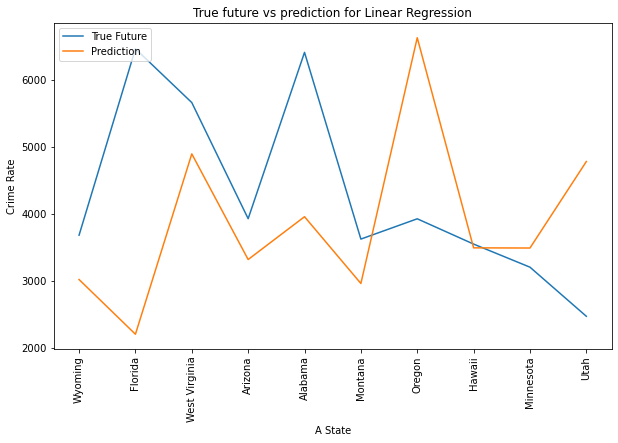

In [38]:
reg=LinearRegression()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preLR=pre
plot_future(pre, 'Linear Regression', y_test)

In [39]:
evaluate_prediction(pre, y_test, 'Linear Regression')

Linear Regression:
Mean Absolute Error: 1477.8120
Root Mean Square Error: 3878295.0384



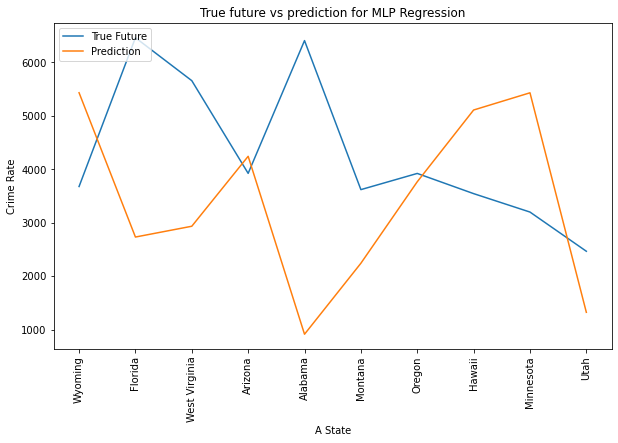

In [40]:
reg=MLPRegressor()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preMLP=pre
plot_future(pre, 'MLP Regression', y_test)

In [41]:
evaluate_prediction(pre, y_test, 'MLP Regression')

MLP Regression:
Mean Absolute Error: 2049.4526
Root Mean Square Error: 6535649.2974



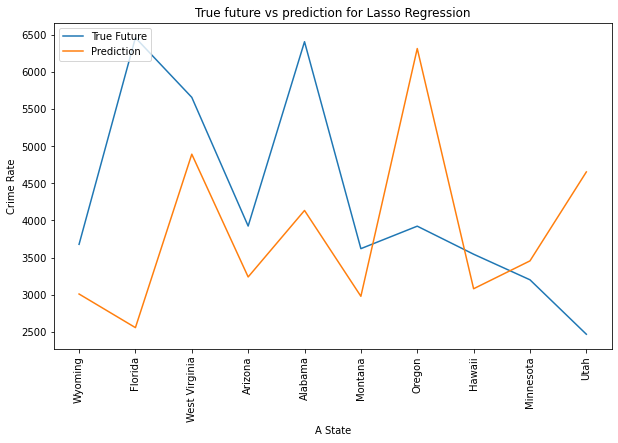

In [42]:
reg=Lasso()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preLR=pre
plot_future(pre, 'Lasso Regression', y_test)

In [43]:
evaluate_prediction(pre, y_test, 'Lasso Regression')

Lasso Regression:
Mean Absolute Error: 1424.4974
Root Mean Square Error: 3314567.0522



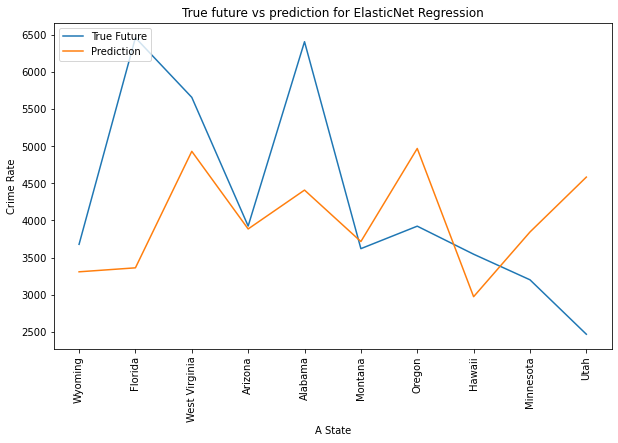

In [44]:
reg=ElasticNet()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preLR=pre
plot_future(pre, 'ElasticNet Regression', y_test)

In [45]:
evaluate_prediction(pre, y_test, 'ElasticNet Regression')

ElasticNet Regression:
Mean Absolute Error: 1071.4019
Root Mean Square Error: 2061318.6288



## Parameter Tuning for Random Forest Regression

In [46]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(Inputs, OUTPUT)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [49]:
Selectedd=list(rf_random.best_params_.values())

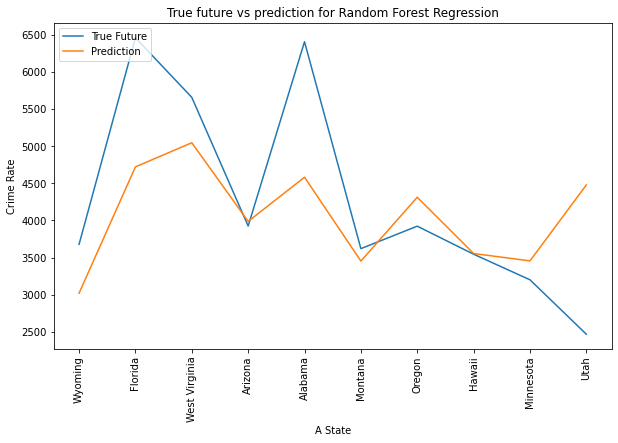

In [50]:
reg=RandomForestRegressor(n_estimators=Selectedd[0],min_samples_split=Selectedd[1],min_samples_leaf=Selectedd[2],
                          max_features=Selectedd[3],max_depth=Selectedd[4],bootstrap=Selectedd[5])
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preRF=pre
plot_future(pre, 'Random Forest Regression', y_test)

In [51]:
evaluate_prediction(pre, y_test, 'Random Forest Regression')

Random Forest Regression:
Mean Absolute Error: 773.2455
Root Mean Square Error: 1146824.0481



In [56]:
Inputs['States']=merged_inner['State']

In [57]:
Inputs.to_csv("Final_Selected_Features.csv")